###  Importing Data and Required Packages

In [34]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf

# Modelling
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import warnings

### Import the CSV Data as Pandas DataFrame

In [35]:
df = pd.read_csv('data\Churn_Modelling.csv')

### Show Top 5 Records

In [36]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dropping Useless Columns 

In [37]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

### Preparing X and Y variables

In [39]:
X = df.drop(columns=['Exited'],axis=1)

In [40]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [41]:
print("Categories in 'Geography' variable:     ",end=" " )
print(df['Geography'].unique())

print("Categories in 'Gender' variable:  ",end=" ")
print(df['Gender'].unique())

Categories in 'Geography' variable:      ['France' 'Spain' 'Germany']
Categories in 'Gender' variable:   ['Female' 'Male']


In [42]:
y = df['Exited']

In [43]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [44]:
X = preprocessor.fit_transform(X)

In [45]:
X.shape

(10000, 13)

### Separate dataset into train and test set

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((8000, 13), (2000, 13))

### Creating an Evaluate Function to give all metrics after Model Training

In [47]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    cm = confusion_matrix(true, predicted)

    return accuracy, precision, recall, cm

In [56]:
# Build the ANN model
def build_ann(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Preprocess labels if necessary
# Assuming `y_train` and `y_test` are binary labels (0 or 1)

# Initialize and train the ANN model
input_dim = X_train.shape[1]
ann_model = build_ann(input_dim)

history = ann_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
200/200 [==============================] - 6s 14ms/step - loss: 0.4436 - accuracy: 0.8087 - val_loss: 0.3841 - val_accuracy: 0.8425
Epoch 2/50
200/200 [==============================] - 1s 7ms/step - loss: 0.3752 - accuracy: 0.8477 - val_loss: 0.3572 - val_accuracy: 0.8481
Epoch 3/50
200/200 [==============================] - 2s 8ms/step - loss: 0.3525 - accuracy: 0.8575 - val_loss: 0.3480 - val_accuracy: 0.8525
Epoch 4/50
200/200 [==============================] - 1s 7ms/step - loss: 0.3448 - accuracy: 0.8594 - val_loss: 0.3450 - val_accuracy: 0.8550
Epoch 5/50
200/200 [==============================] - 2s 8ms/step - loss: 0.3398 - accuracy: 0.8622 - val_loss: 0.3463 - val_accuracy: 0.8581
Epoch 6/50
200/200 [==============================] - 1s 7ms/step - loss: 0.3361 - accuracy: 0.8619 - val_loss: 0.3411 - val_accuracy: 0.8544
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3327 - accuracy: 0.8642 - val_loss: 0.3383 - val_accuracy: 0.8550
Epoch

In [57]:
# Make predictions
y_train_pred_probs = ann_model.predict(X_train)
y_test_pred_probs = ann_model.predict(X_test)

# Convert probabilities to binary predictions
y_train_pred = (y_train_pred_probs > 0.5).astype(int)
y_test_pred = (y_test_pred_probs > 0.5).astype(int)

# Evaluate Train and Test datasets
train_accuracy, train_precision, train_recall, train_cm = evaluate_model(y_train, y_train_pred)
test_accuracy, test_precision, test_recall, test_cm = evaluate_model(y_test, y_test_pred)

# Display results
print("ANN Model Performance:")
print("\nTraining Set:")
print(f"- Accuracy: {train_accuracy:.4f}")
print(f"- Precision: {train_precision:.4f}")
print(f"- Recall: {train_recall:.4f}")
print(f"- Confusion Matrix:\n{train_cm}")

print("\nTest Set:")
print(f"- Accuracy: {test_accuracy:.4f}")
print(f"- Precision: {test_precision:.4f}")
print(f"- Recall: {test_recall:.4f}")
print(f"- Confusion Matrix:\n{test_cm}")


63/63 [==============================] - 1s 11ms/step
ANN Model Performance:

Training Set:
- Accuracy: 0.8799
- Precision: 0.8432
- Recall: 0.5103
- Confusion Matrix:
[[6200  156]
 [ 805  839]]

Test Set:
- Accuracy: 0.8565
- Precision: 0.7190
- Recall: 0.4427
- Confusion Matrix:
[[1539   68]
 [ 219  174]]


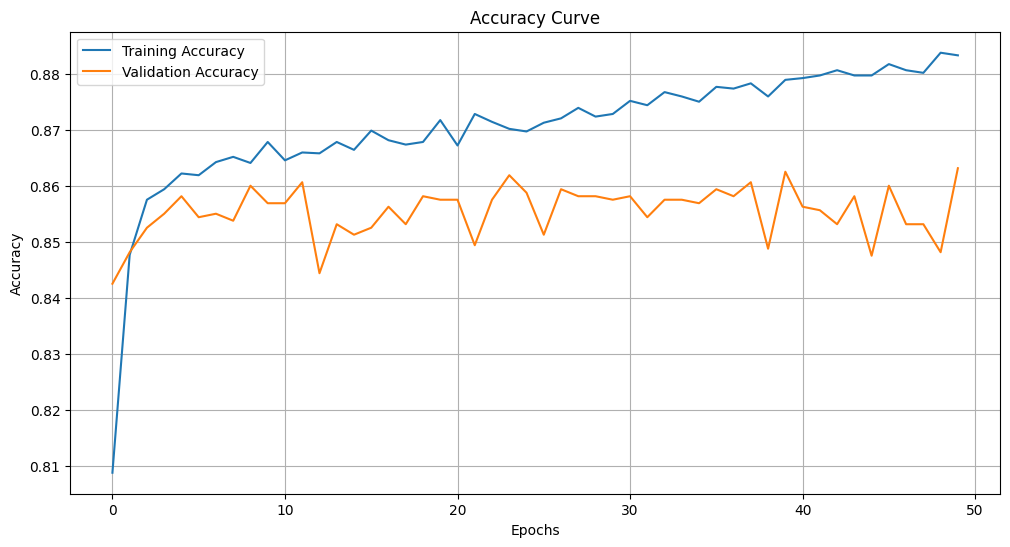

In [58]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

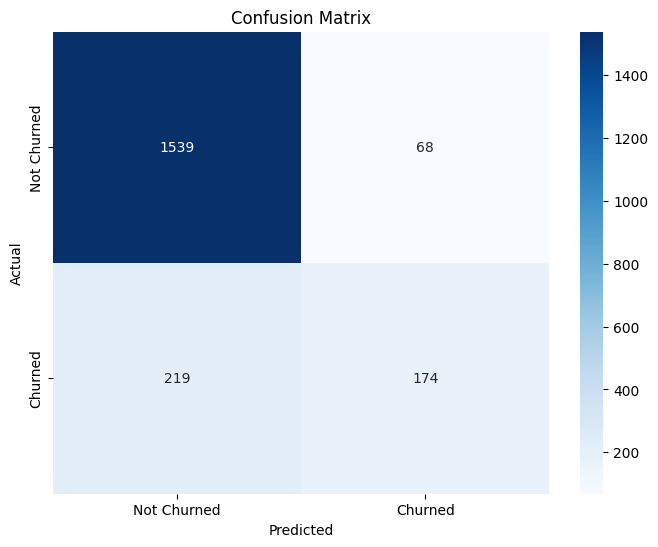

In [59]:
# Plotting confusion matrix for test data
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()